## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Churn Analysis: Creating Cohorts Based on Tenure
- tenure = amount of months customer is or has been a customer 

### Part 1: Tenure Analysis

In [5]:
## The 3 Contract types
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

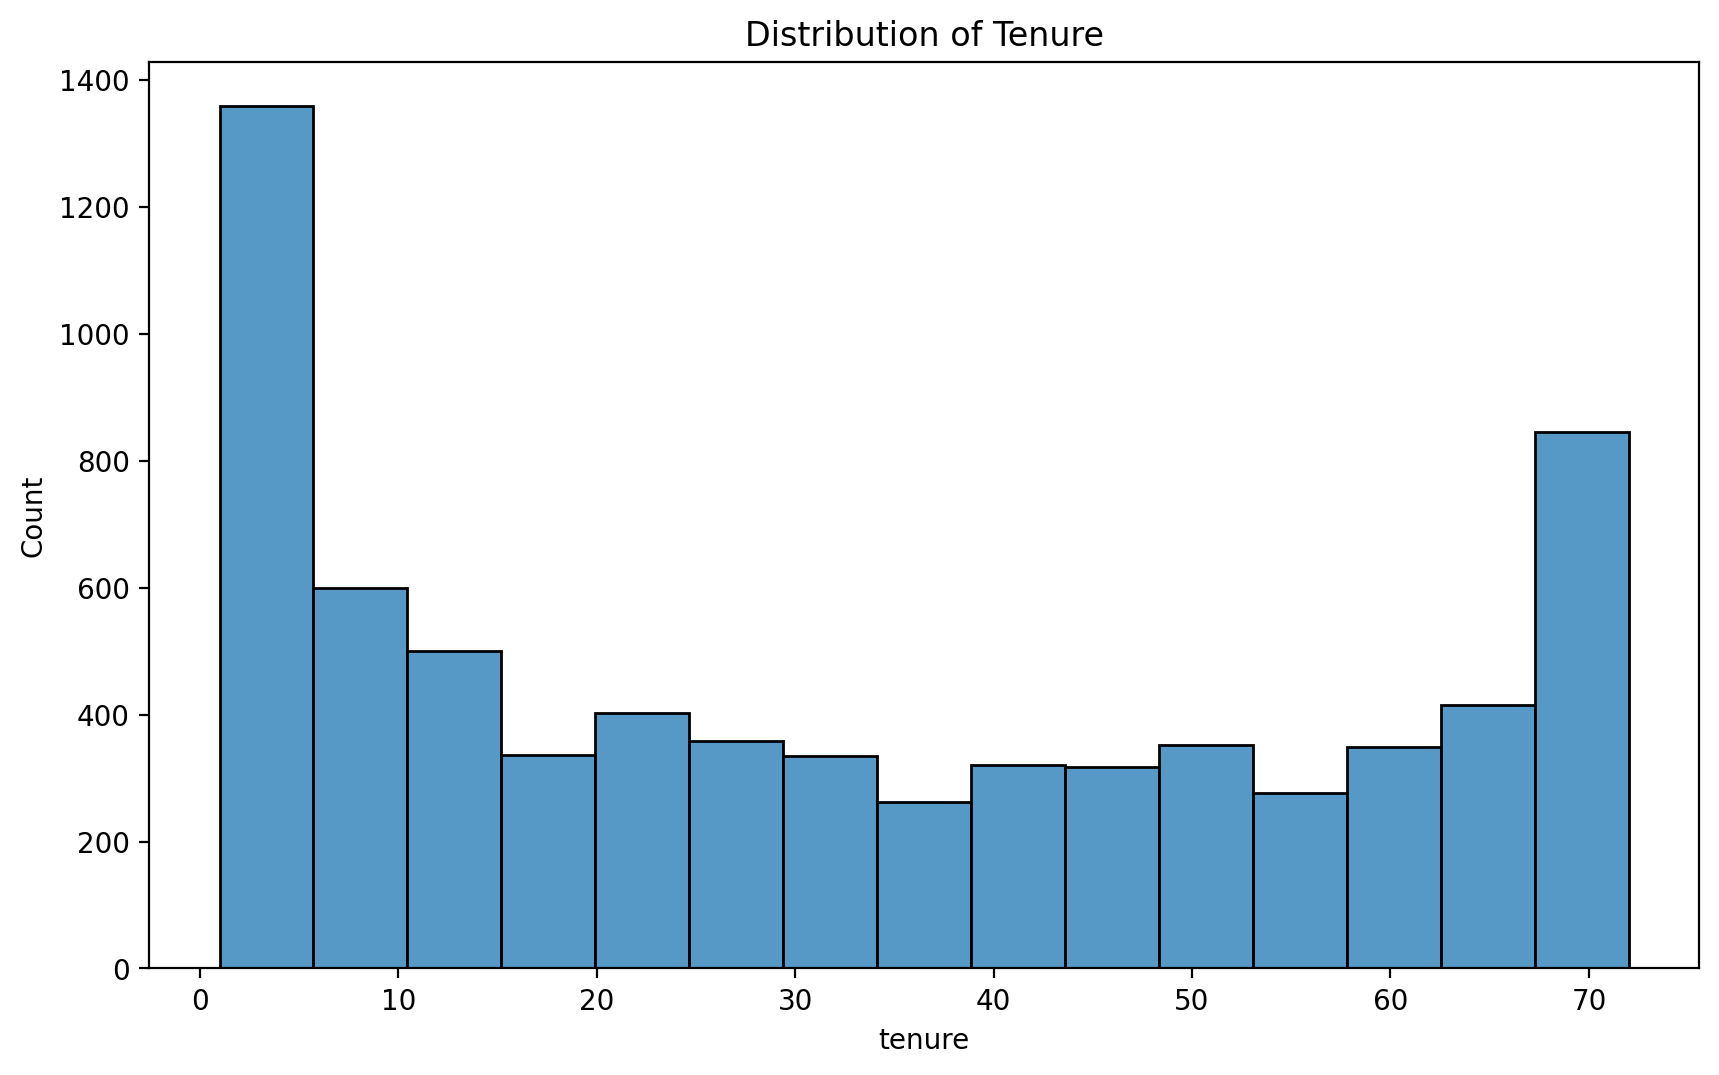

In [6]:
plt.figure(figsize=(10,6), dpi=200)
plt.title('Distribution of Tenure')
sns.histplot(data=df,x='tenure');

<Figure size 2000x1200 with 0 Axes>

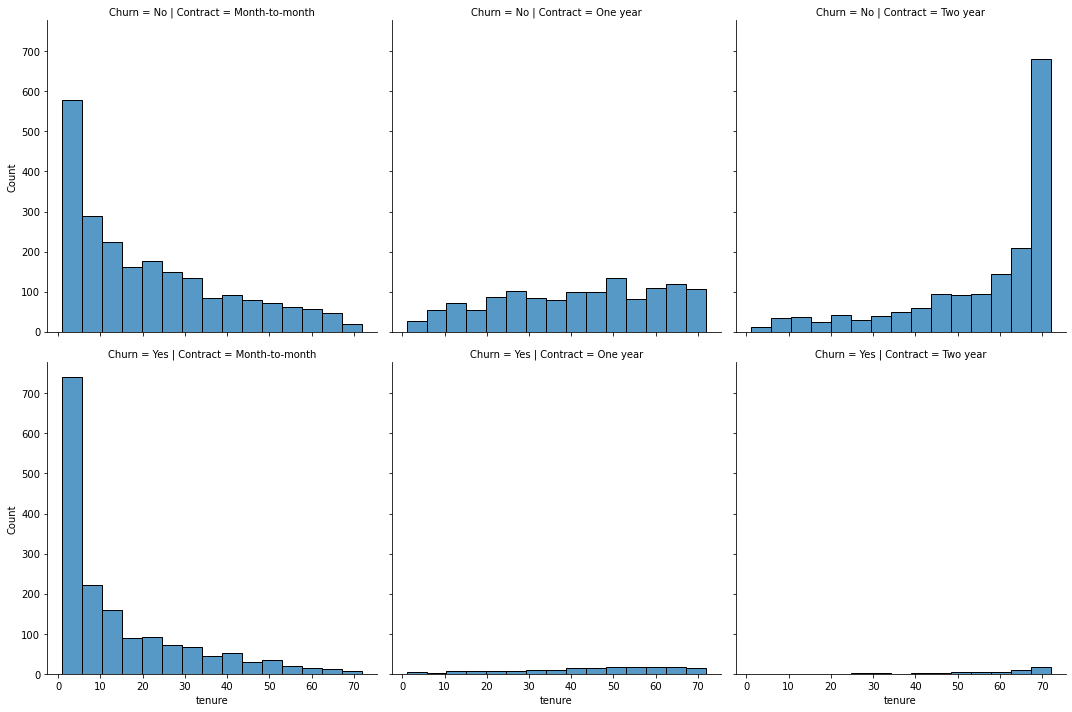

In [26]:
plt.figure(figsize=(10,6),dpi=200)
sns.displot(data=df,x='tenure',col='Contract',row='Churn');

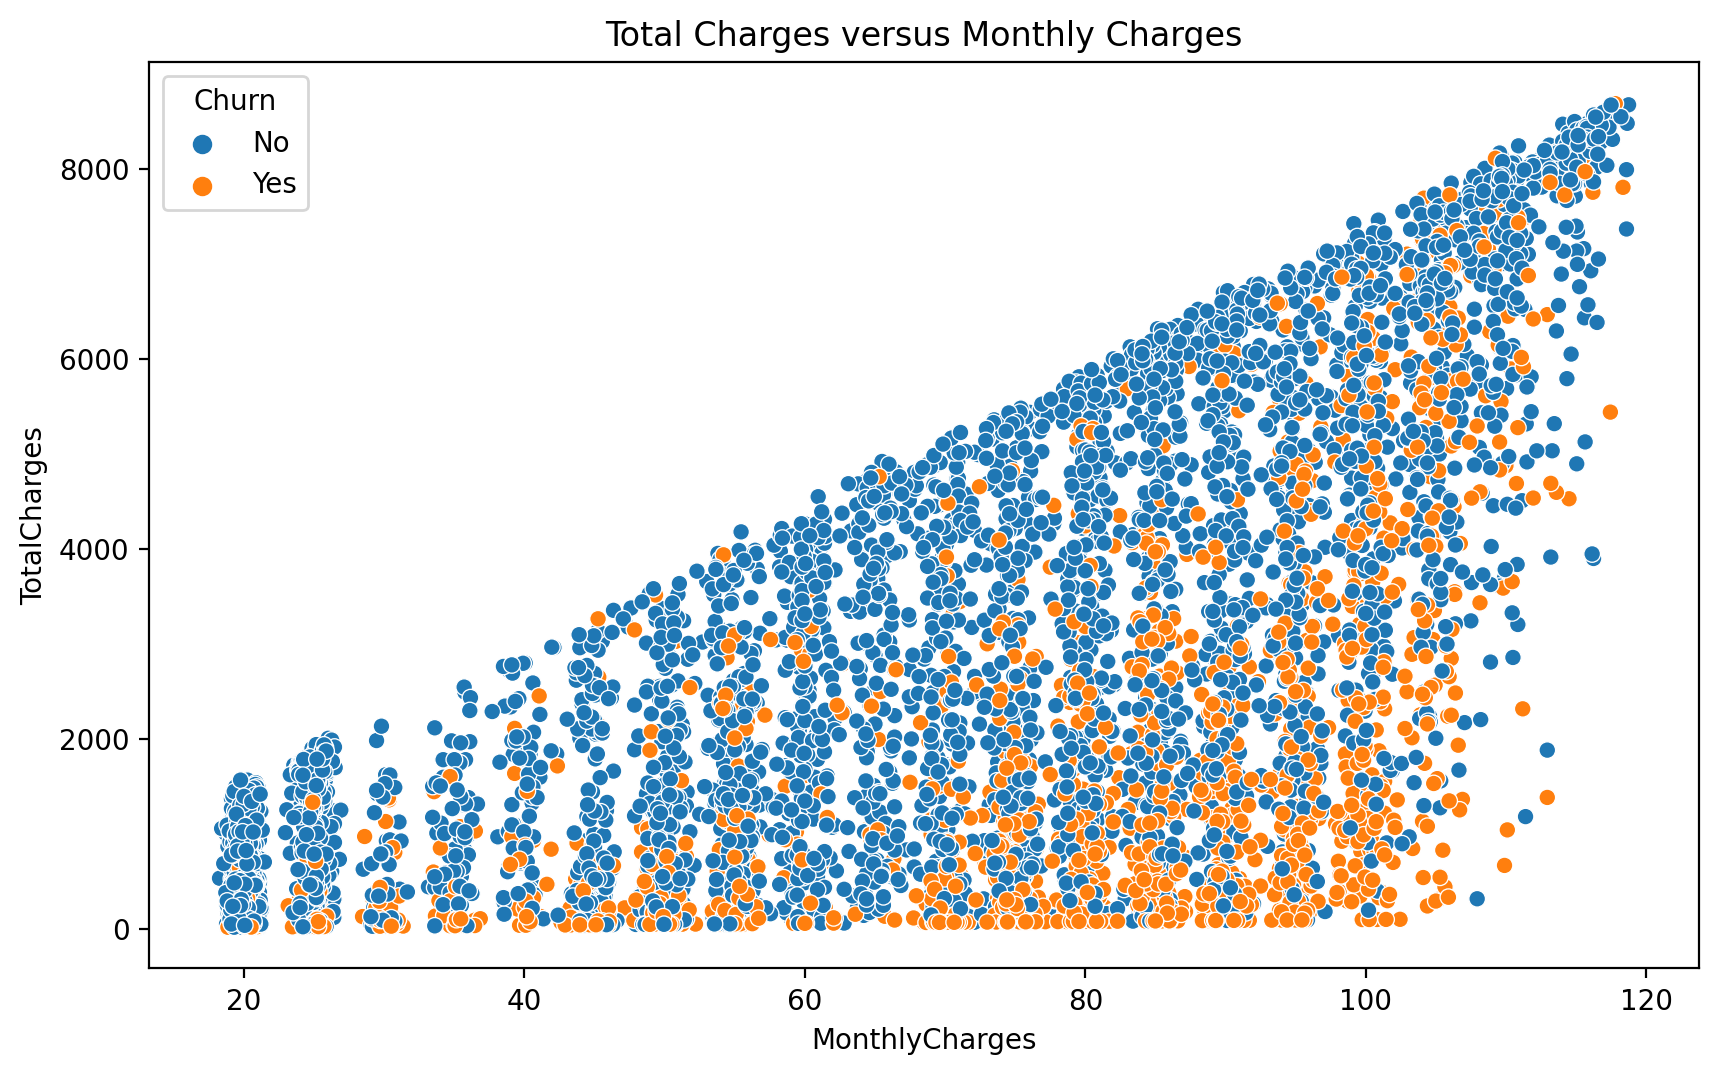

In [19]:
plt.figure(figsize=(10,6),dpi=200)
plt.title('Total Charges versus Monthly Charges')
sns.scatterplot(data=df, y = 'TotalCharges', x = 'MonthlyCharges', hue='Churn');

### Part 2: Creating Tenure Cohorts

- treating each tenure as its own cohort, we first find the Churn Rate (percentage that had Yes Churn).

In [9]:
df['tenure'].max()

72

In [10]:
rates = []
for i in range(1,73):
    churn_rate = np.round(len(df[(df['tenure']==i)&(df['Churn']=='Yes')])/len(df[df['tenure']==i])*100, 2)
    rates.append(churn_rate)

In [11]:
churn_rate_df = pd.DataFrame({'Tenure':range(1,73), 'Churn Yes Rate': rates})

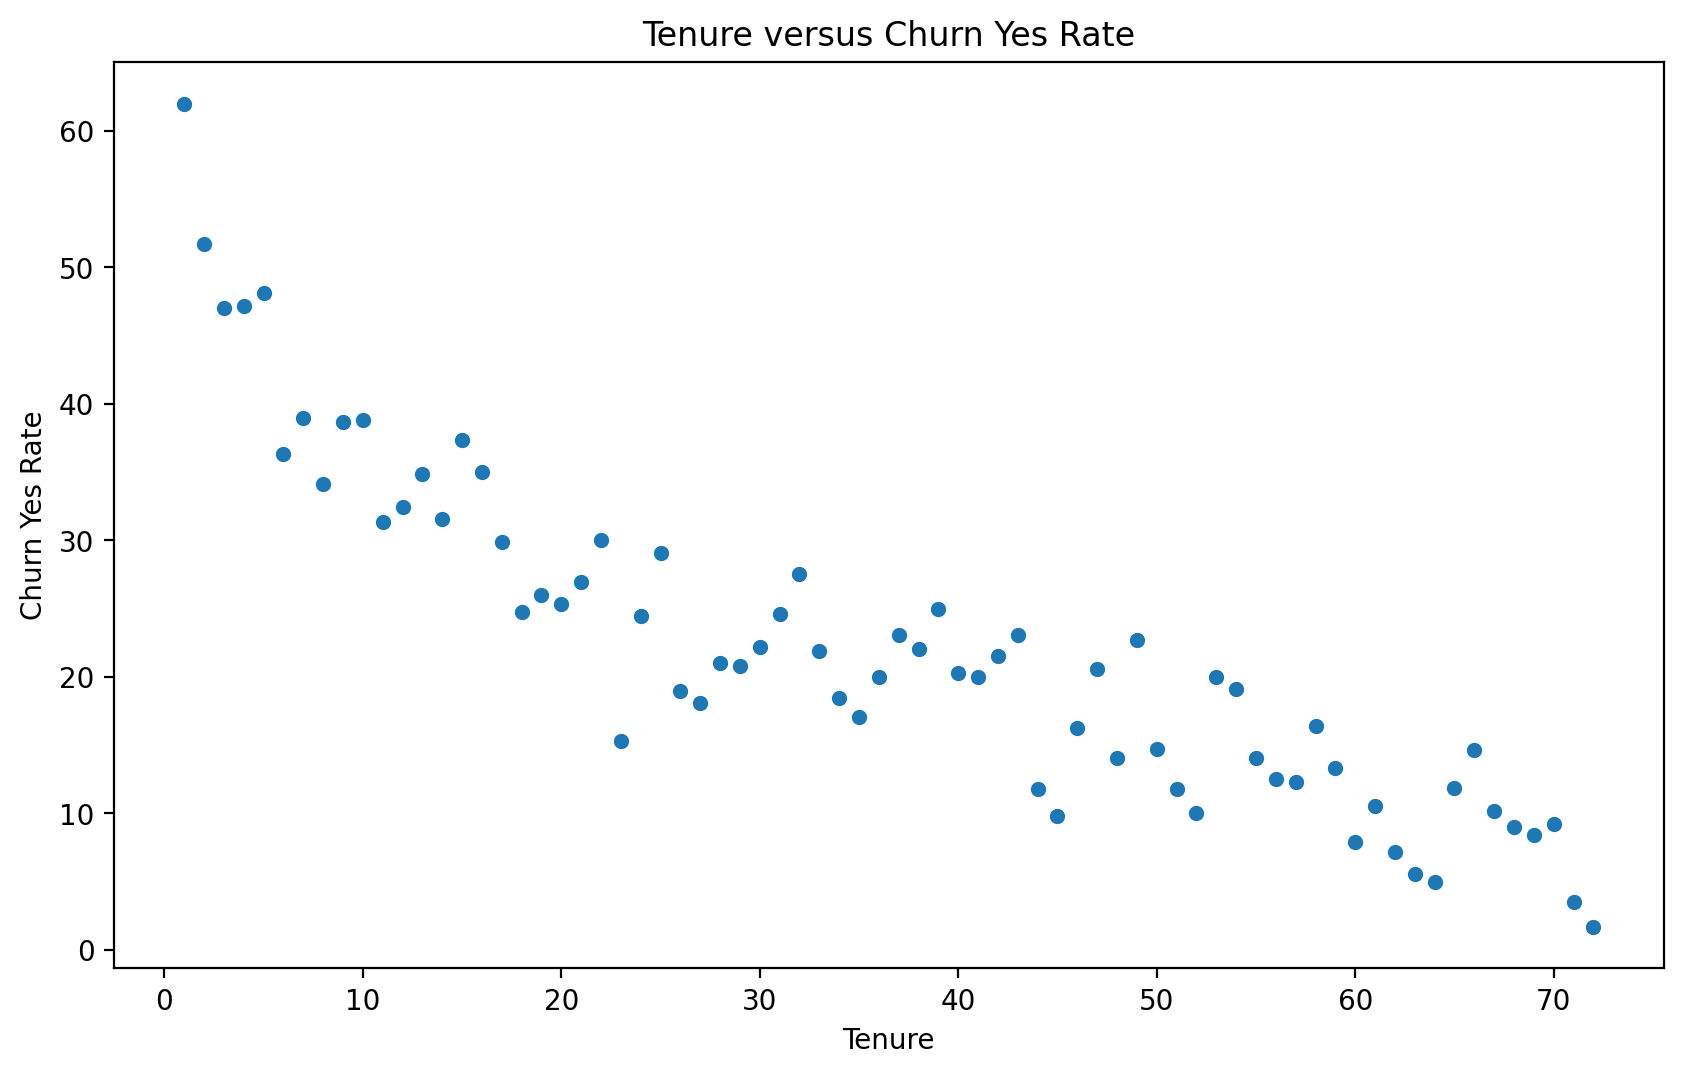

In [13]:
## As tenure increases, more ppl are dropping out
## Meaning, the longer a person has used the service, the less the percentage of discontinuing
plt.figure(figsize=(10,6), dpi=200)
plt.title('Tenure versus Churn Yes Rate')
sns.scatterplot(data = churn_rate_df, x=churn_rate_df['Tenure'], y = churn_rate_df['Churn Yes Rate']);

### Part 3: Broader Tenure Cohort

In [16]:
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [17]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [18]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


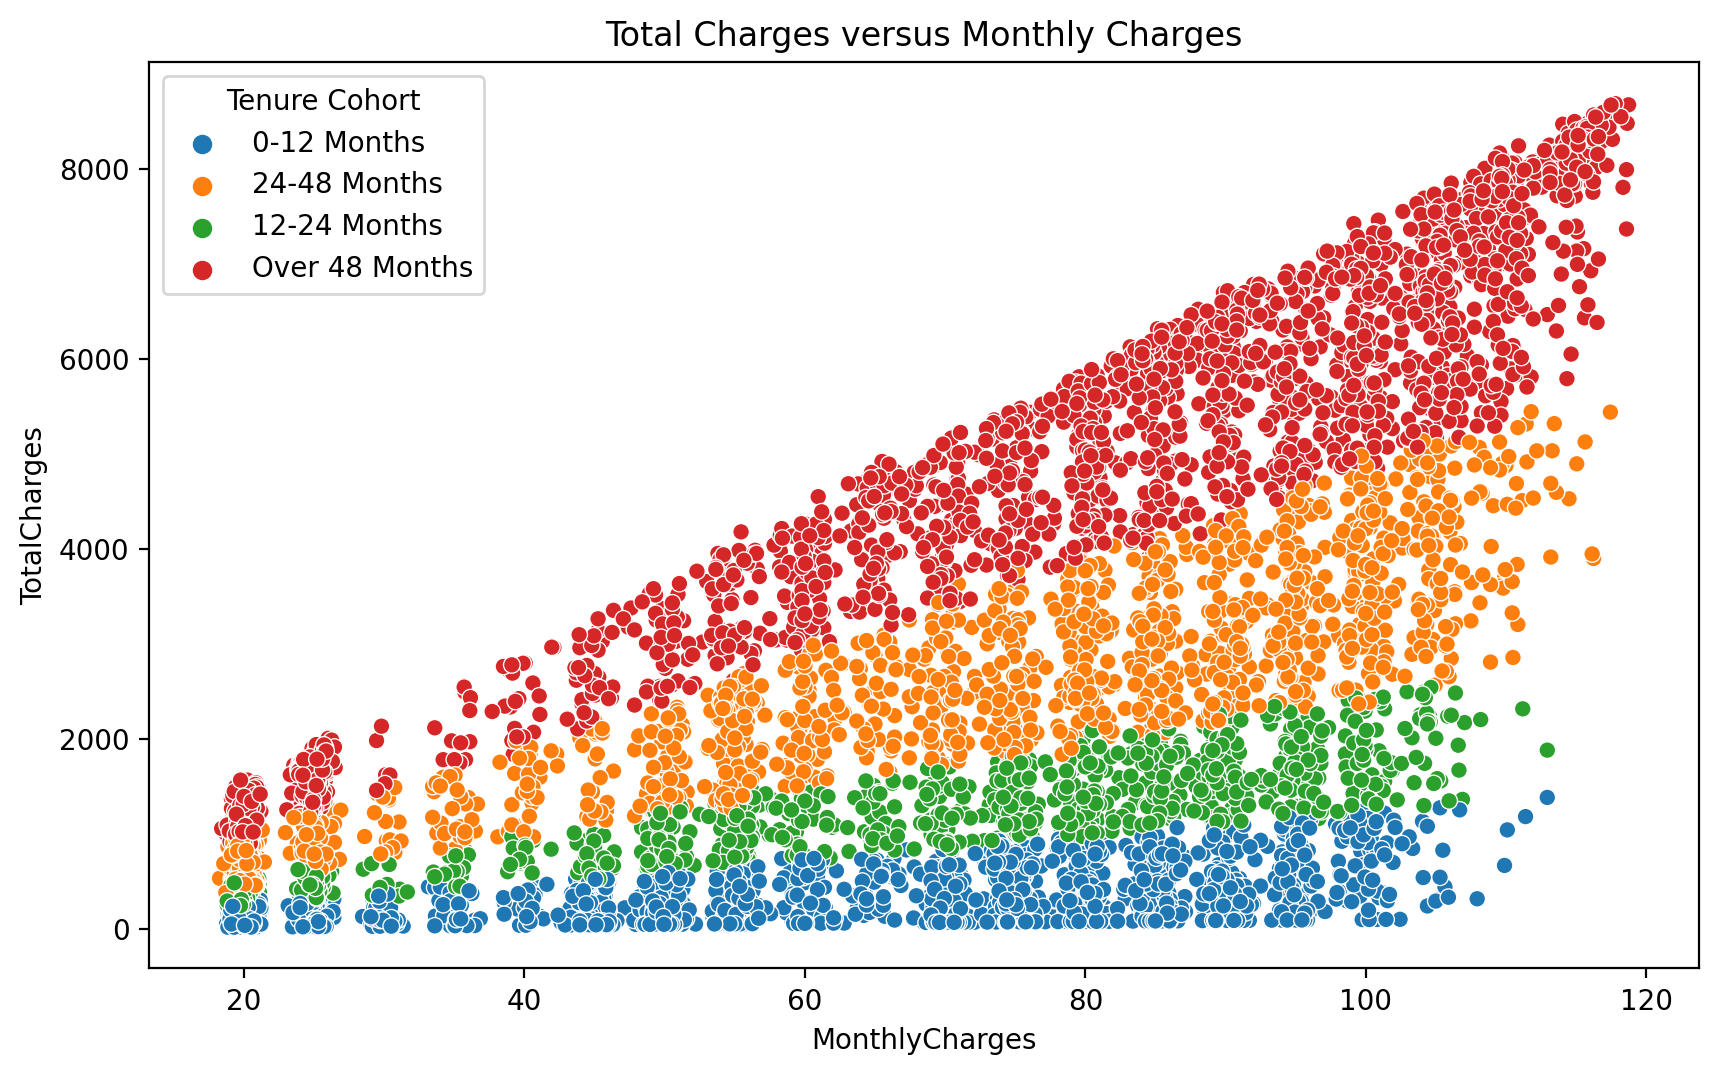

In [20]:
plt.figure(figsize=(10,6),dpi=200)
plt.title('Total Charges versus Monthly Charges')
sns.scatterplot(data=df, y = 'TotalCharges', x = 'MonthlyCharges', hue='Tenure Cohort');

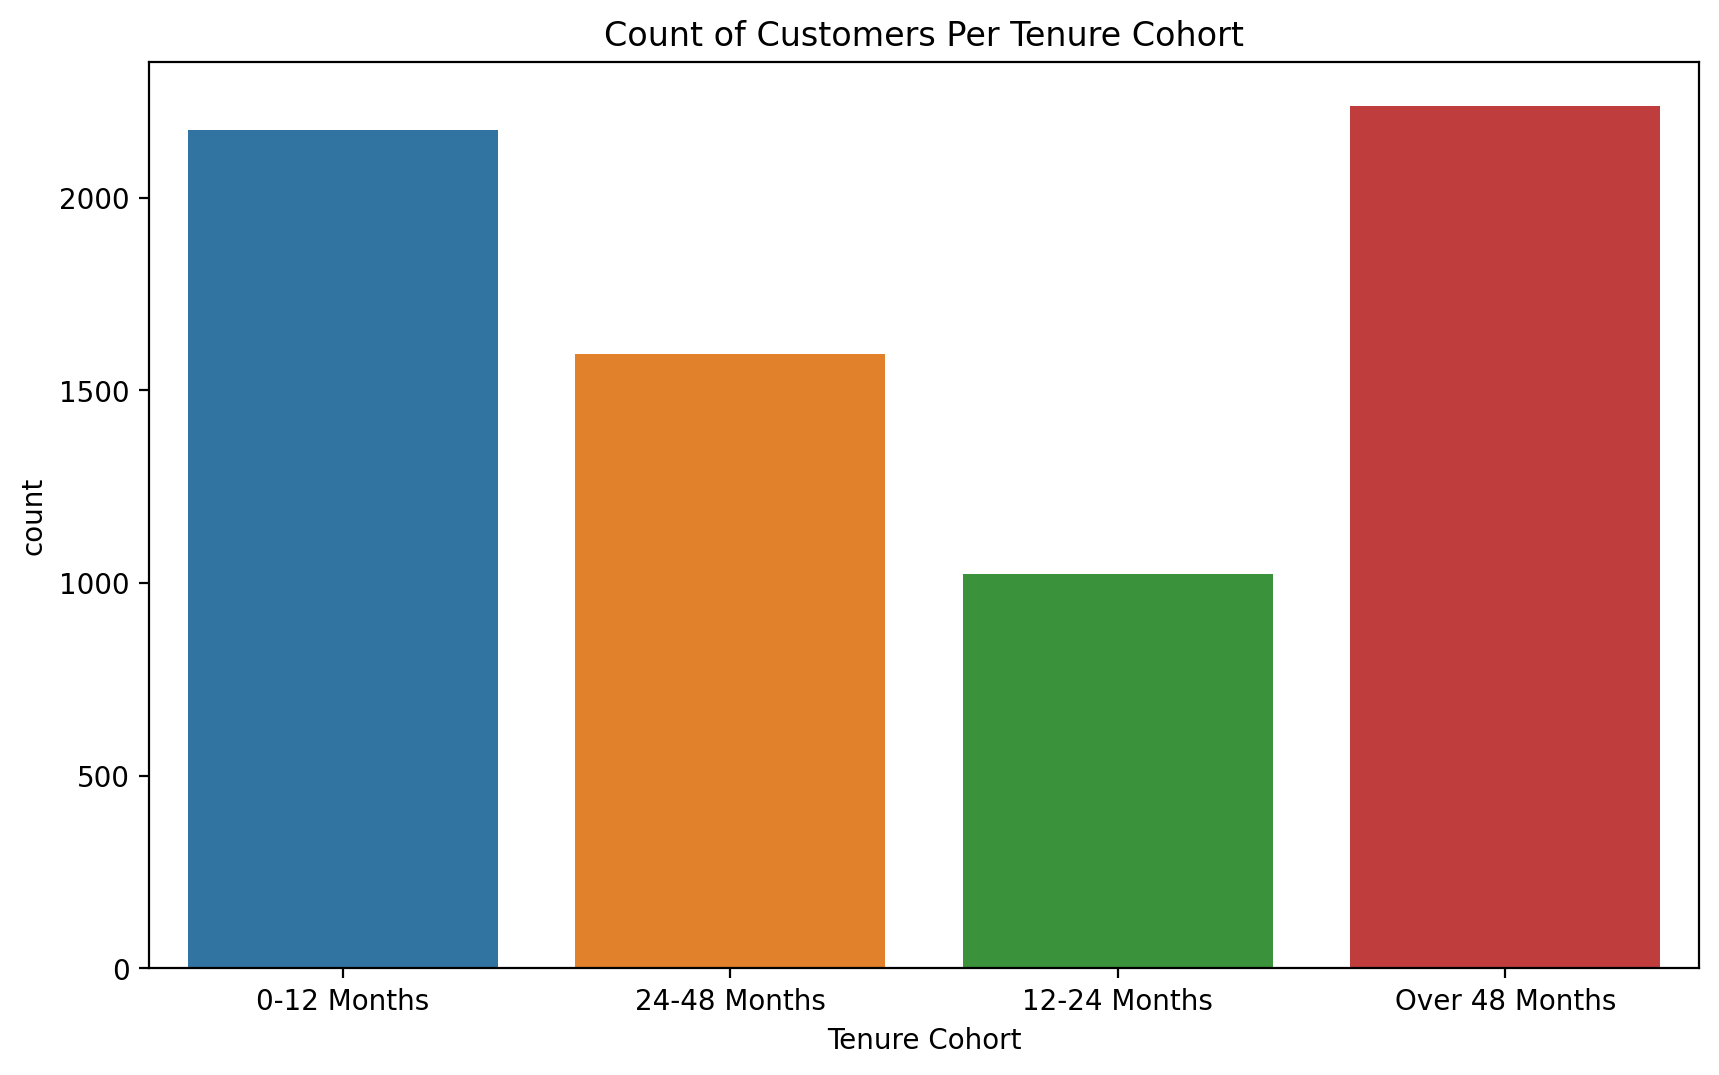

In [22]:
plt.figure(figsize=(10,6),dpi=200)
plt.title('Count of Customers Per Tenure Cohort')
sns.countplot(data = df, x='Tenure Cohort');

<Figure size 2000x1200 with 0 Axes>

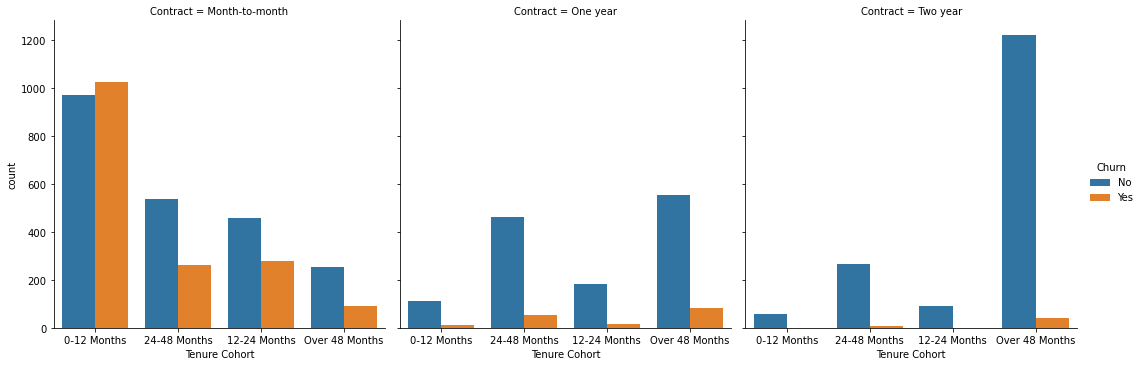

In [30]:
plt.figure(figsize=(10,6),dpi=200)
sns.catplot(data=df, x='Tenure Cohort', col = 'Contract', hue='Churn', kind='count');